In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    final:str

In [8]:
def first_node(state:AgentState)->AgentState:
    """This is the first node in the sequence"""
    state["final"] = f"Hi {state["name"]}! "
    return state

def second_node(state:AgentState)->AgentState:
    """This is the second node in the sequence"""
    state["final"] = state["final"] + f"You are {state["age"]} years old!"
    return state

In [9]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_edge("first_node", "second_node")
graph.set_entry_point("first_node")
graph.set_finish_point("second_node")
r = graph.compile()

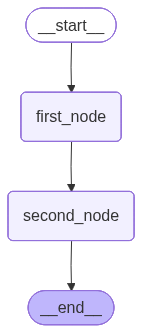

In [10]:
from IPython.display import Image, display
display(Image(r.get_graph().draw_mermaid_png()))

In [11]:
result = r.invoke({"name": "Bob", "age": 24})

In [14]:
print(result["final"])

Hi Bob! You are 24 years old!


## Exercise for Graph III

In [16]:
from typing import List

In [18]:
class AgentState2(TypedDict):
    name: str
    age: str
    skills : List[str]
    final :str

In [19]:
def first_node(state:AgentState2)->AgentState2:
    """This is the first node"""
    state["final"] = f"{state["name"]}, welcome to the system! "
    return state

In [ ]:
def second_node(state:AgentState2)-> AgentState2:
    """This is the second node describing user's age"""
    state["final"] = state["final"] + f"You are {state["age"]} old! "
    return state

In [26]:
def third_node(state:AgentState2)->AgentState2:
    """This is the third node listing the user's skills"""
    state["final"] = state["final"] + f"You have skills in: {",".join(state["skills"])}"
    return state

In [27]:
graph = StateGraph(AgentState2)

graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_node("third", third_node)

graph.add_edge("first", "second")
graph.add_edge("second", "third")
graph.set_entry_point("first")
graph.set_finish_point("third")
app = graph.compile()


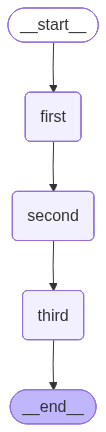

In [28]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
result = app.invoke({"name": "Linda", "age": 31, "skills":["Python", "Machine Learning", "LangGraph"]})

In [30]:
print(result["final"])

Linda, welcome to the system! You are 31 old! You have skills in: Python,Machine Learning,LangGraph
